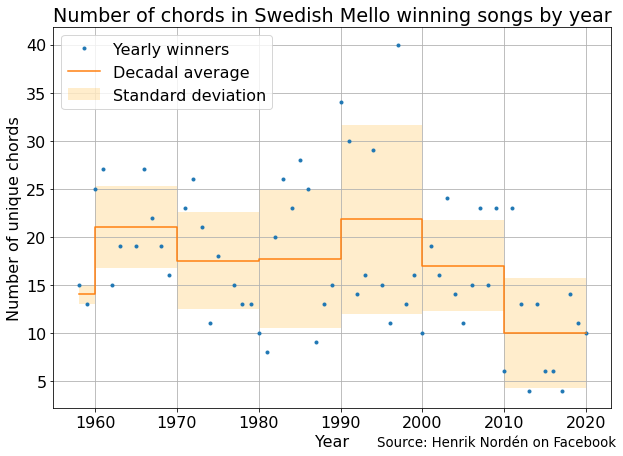

In [4]:
import numpy as np
import matplotlib.pyplot as pp
import matplotlib

startingYear = 58
yearsNotIncluded = [1964, 1970, 1976]
#Number of chords in winners by decade
c50 = np.array([15, 13])
c60 = np.array([25, 27, 15, 19, 19, 27, 22, 19, 16])
c70 = np.array([23, 26, 21, 11, 18, 15, 13, 13])
c80 = np.array([10, 8, 20, 26, 23, 28, 25, 9, 13, 15])
c90 = np.array([34, 30, 14, 16, 29, 15, 11, 40, 13, 16])
c00 = np.array([10, 19, 16, 24, 14, 11, 15, 23, 15, 23])
c10 = np.array([6, 23, 13, 4, 13, 6, 6, 4, 14, 11])
c20 = np.array([10])

#Create mean and standard deviation arrays
chordList = [c50, c60, c70, c80, c90, c00, c10, c20]
chords = np.hstack([c50, c60, c70, c80, c90, c00, c10, c20])
chordMean = np.array([np.mean(c50)] * 2)
chordStd = np.array([np.std(c50)] * 2)

for c in chordList[1:-1]:
    chordMean = np.hstack([chordMean, [np.mean(c)] * 10])
    chordStd = np.hstack([chordStd, [np.std(c)]* 10])
chordMean = np.hstack([chordMean, np.mean(c20)])
chordStd = np.hstack([chordStd, np.std(c20)])

#Exclude years with no Swedish Mello
year = np.arange(startingYear, startingYear + len(chords) + len(yearsNotIncluded)) + 1900
deletes = []
for y in year:
    if y in yearsNotIncluded:
        ind = np.where(year == y)[0][0]
        deletes.append(ind)
dyear = np.delete(year, deletes)

#Plot this bad boy
fig1 = pp.figure(figsize=(10.0, 7.0))
pp.plot(dyear, chords, '.')
pp.plot(year, chordMean, drawstyle = 'steps-post')
pp.fill_between(year, chordMean-chordStd, chordMean+chordStd, step='post', alpha=0.2, facecolor='orange')
pp.grid()
axes1 = pp.gca()
axes1.set_ylabel('Number of unique chords')
pp.xlabel('Year')
pp.title('Number of chords in Swedish Mello winning songs by year')
pp.figtext(0.575, 0.05, 'Source: Henrik Nordén on Facebook', fontsize='small')
pp.legend(['Yearly winners', 'Decadal average', 'Standard deviation'])
font = {'size' : 16}
matplotlib.rc('font', **font)